In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing California Housing Prices Dataset

from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("housing.csv")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("housing.csv"))

housing = load_housing_data()

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df=housing.copy()

In [5]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


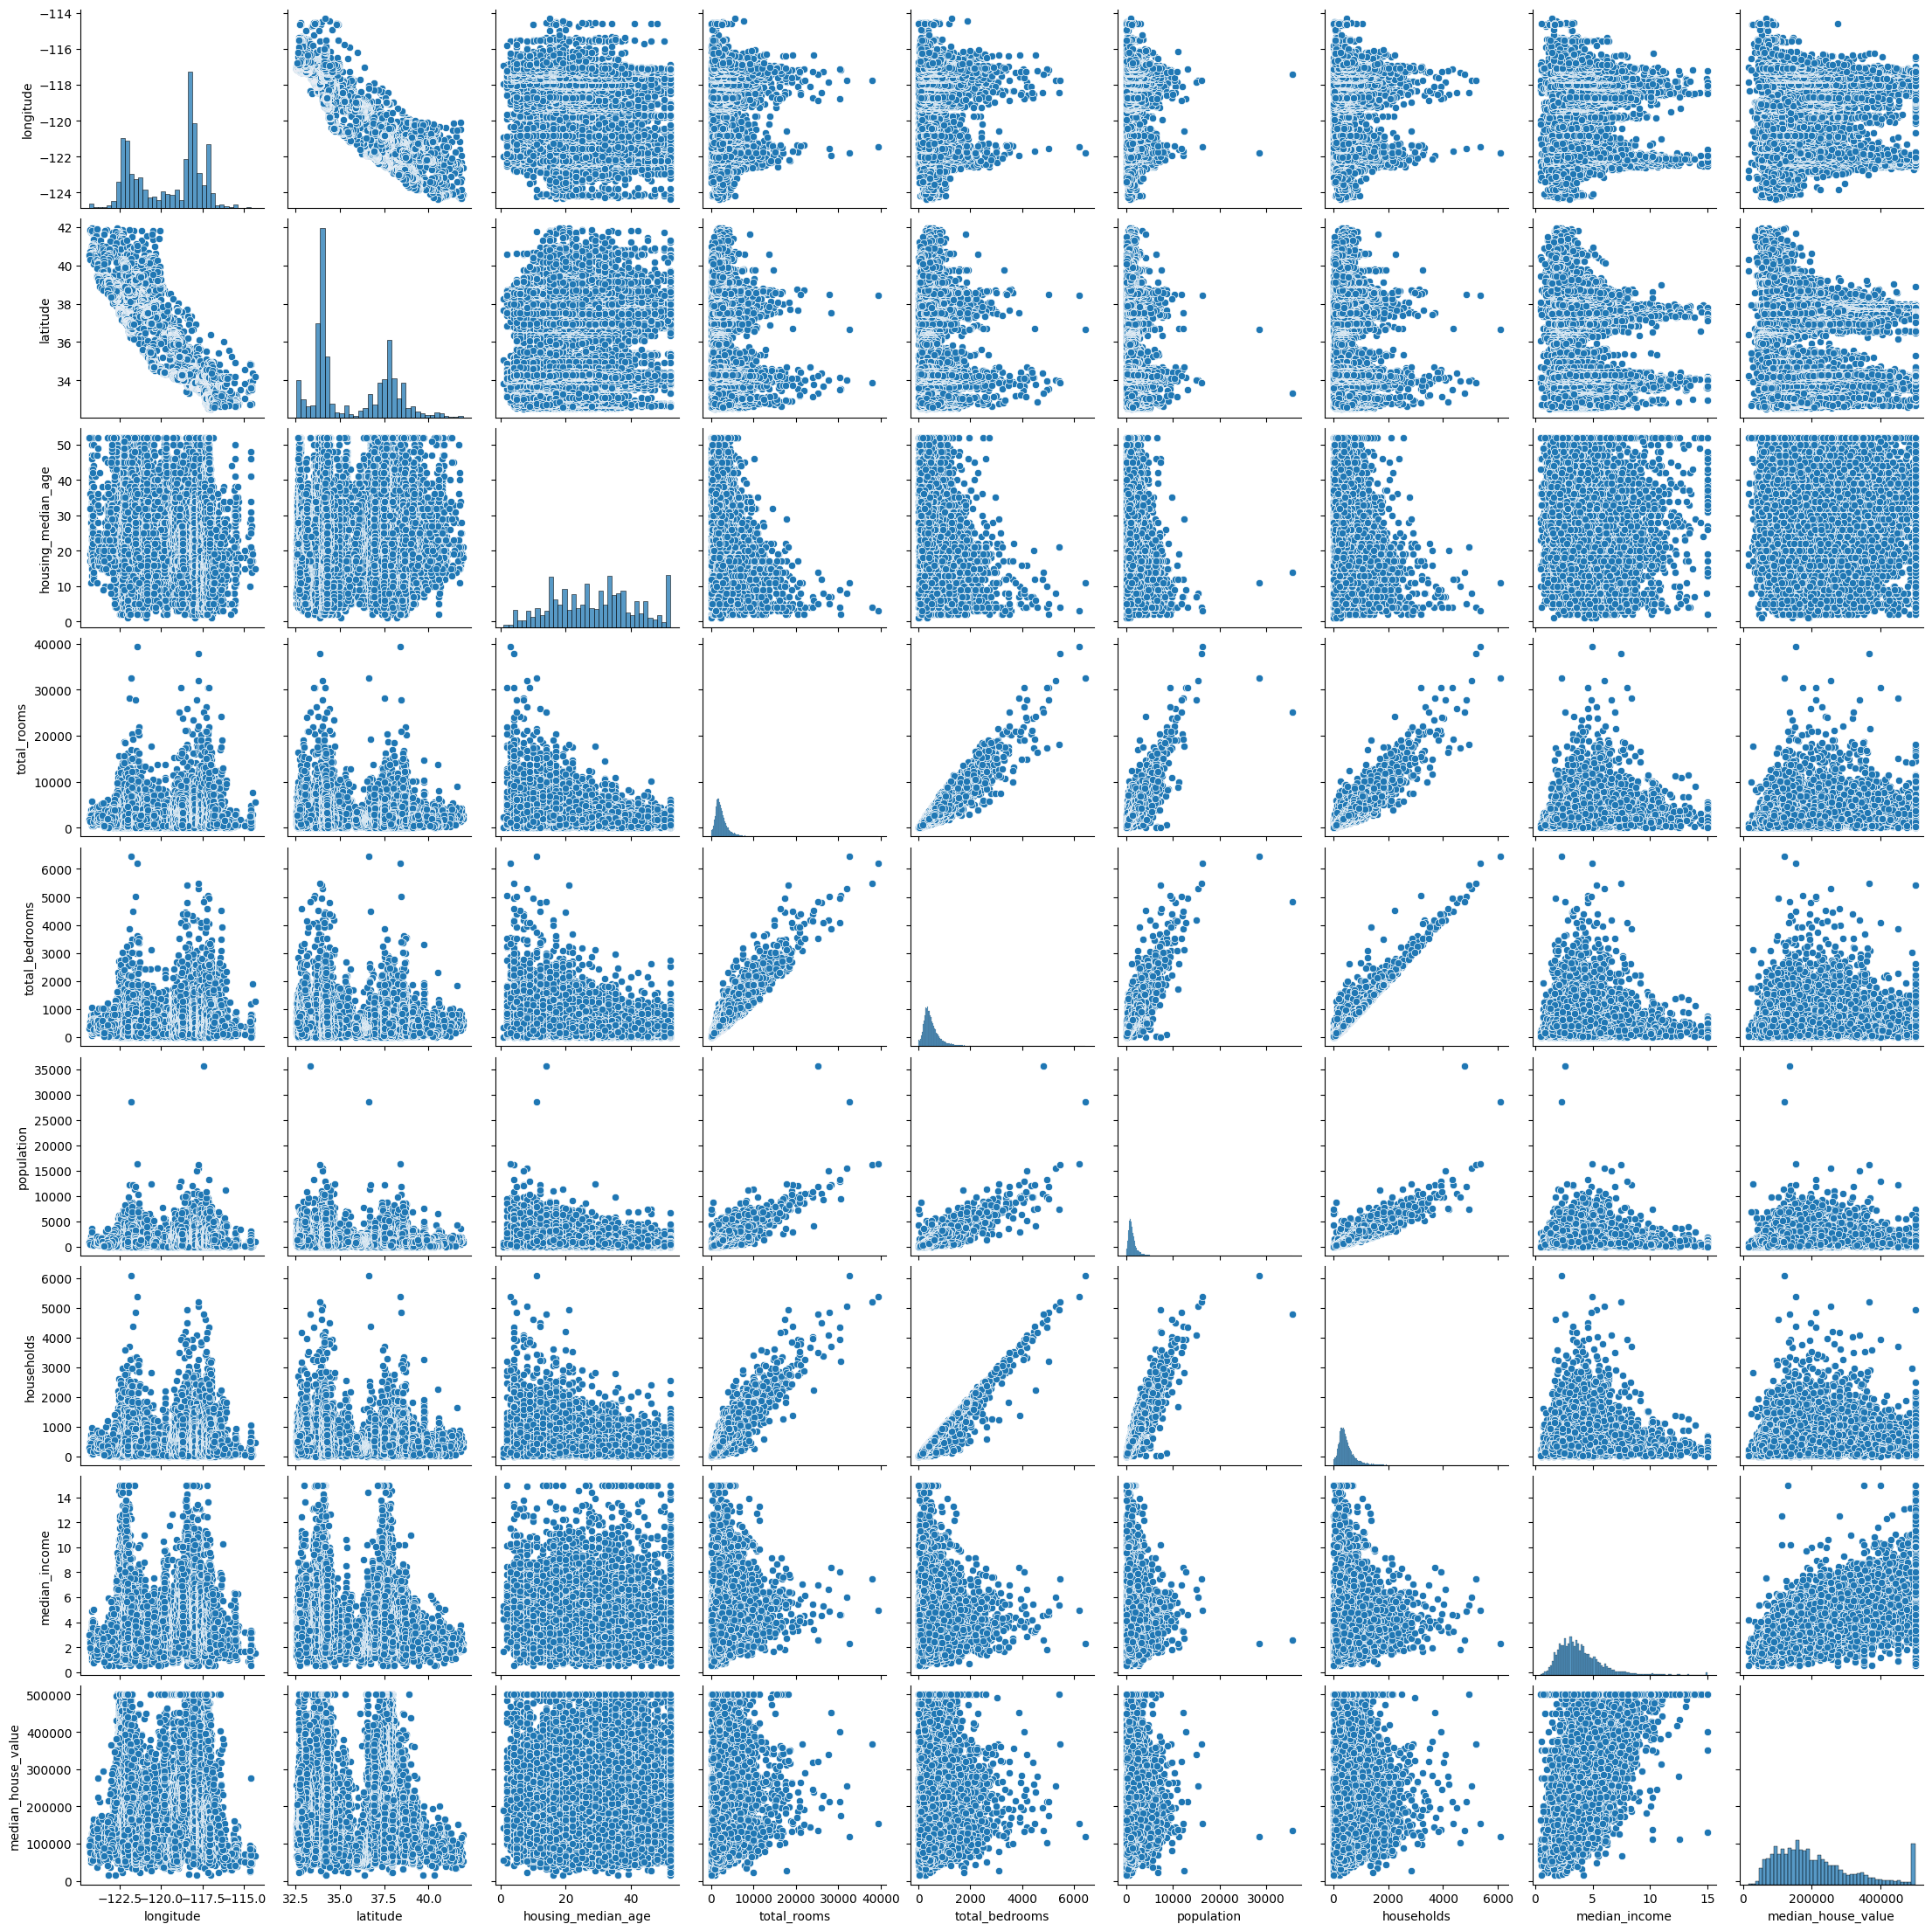

In [9]:
sns.pairplot(housing)
plt.show()

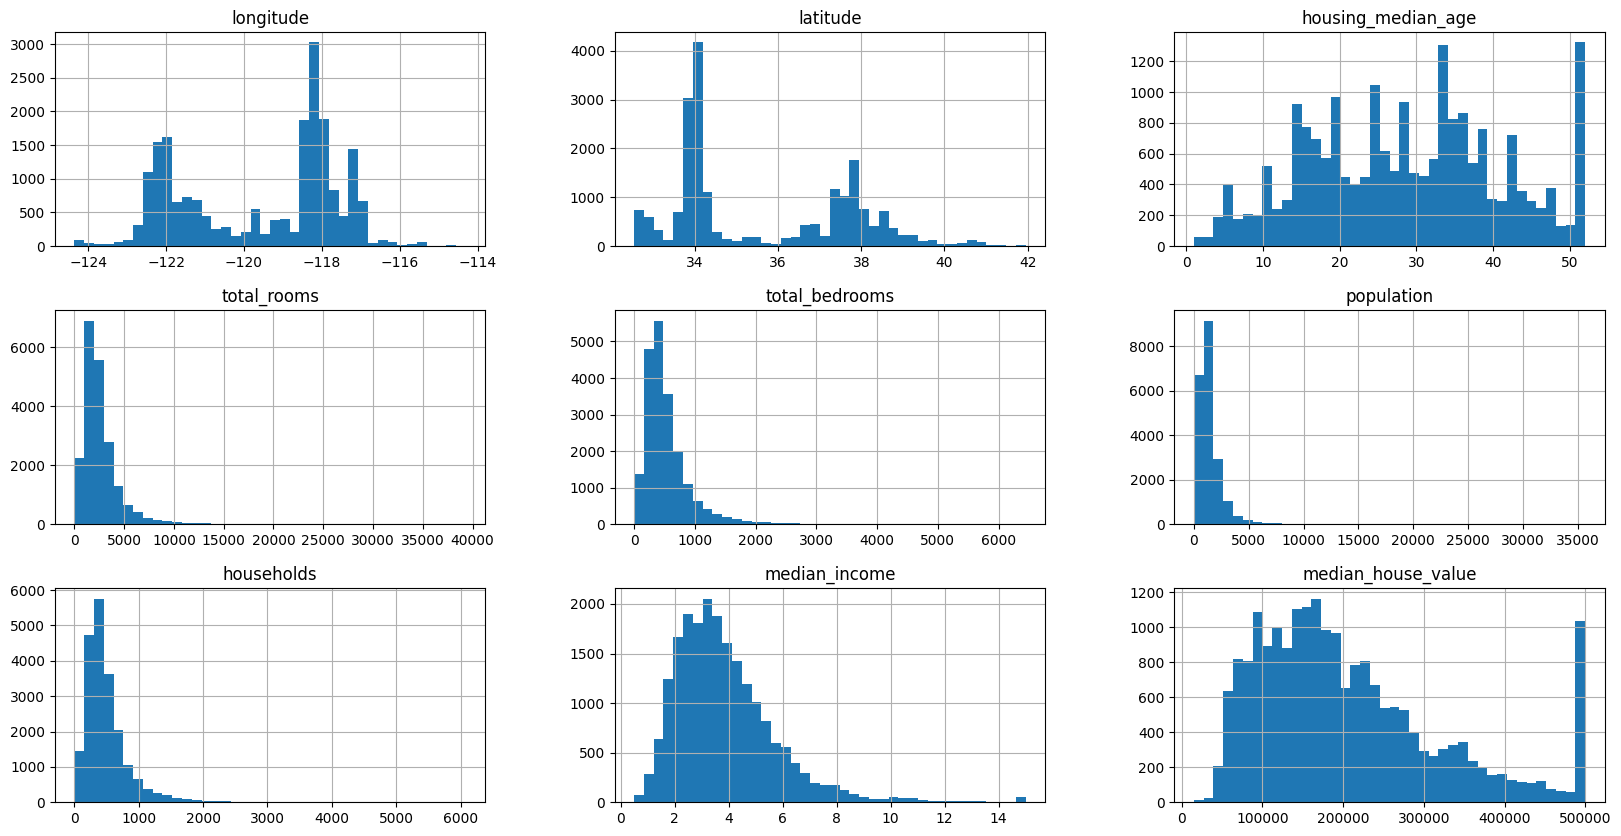

In [10]:
%matplotlib inline
housing.hist(bins=40,figsize=(20,10))
plt.show()

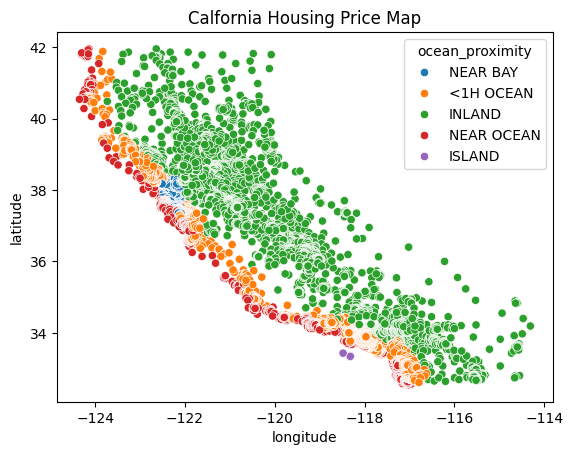

In [11]:
# let's see how actual calfornia dataset looks like 
sns.scatterplot(x=housing.longitude,y=housing.latitude,hue=housing['ocean_proximity'])
plt.title('Calfornia Housing Price Map')
plt.show()

In [12]:
# checking the correlation between different features
corr=housing.drop(columns=['ocean_proximity']).corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


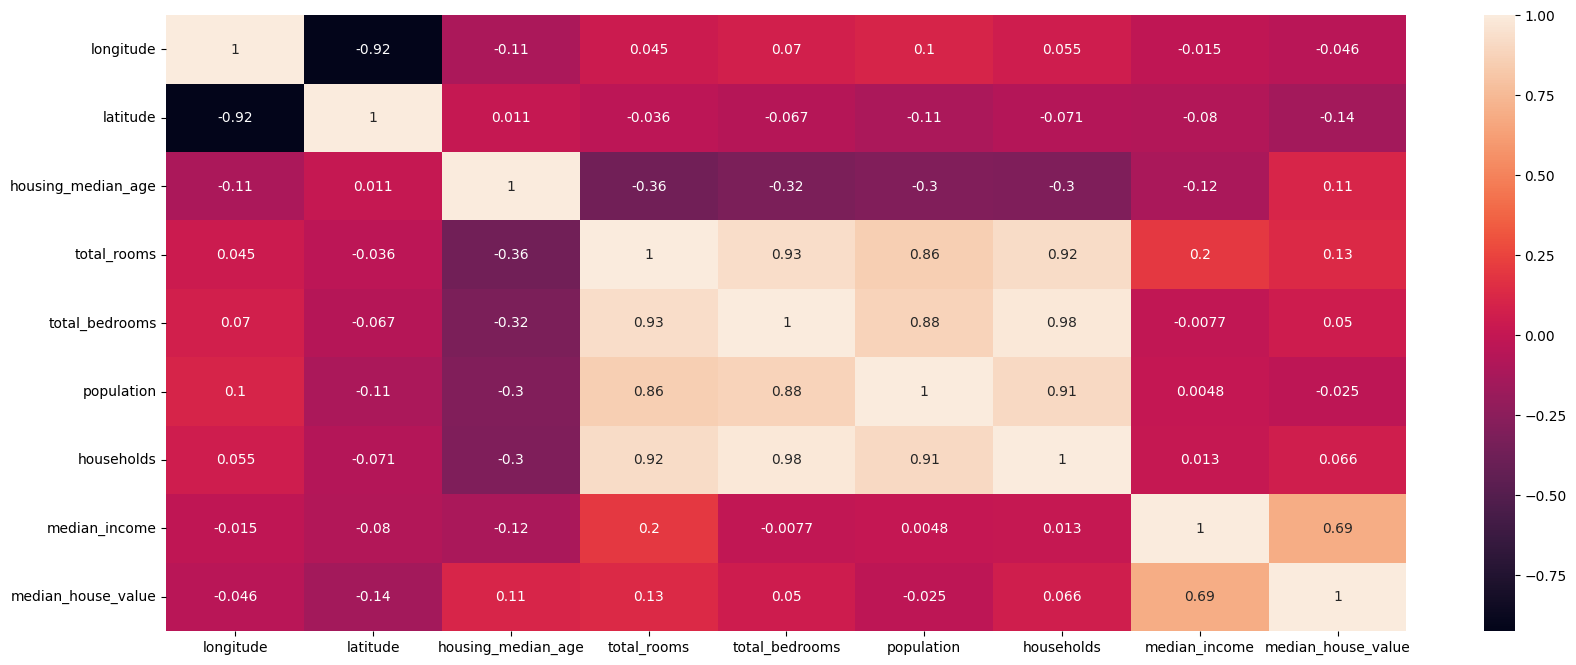

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.show()


In [14]:
# To get rid of multicollinearity we try some new features in our dataset 

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [15]:
corr1=housing.drop(columns=['ocean_proximity']).corr()
corr1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


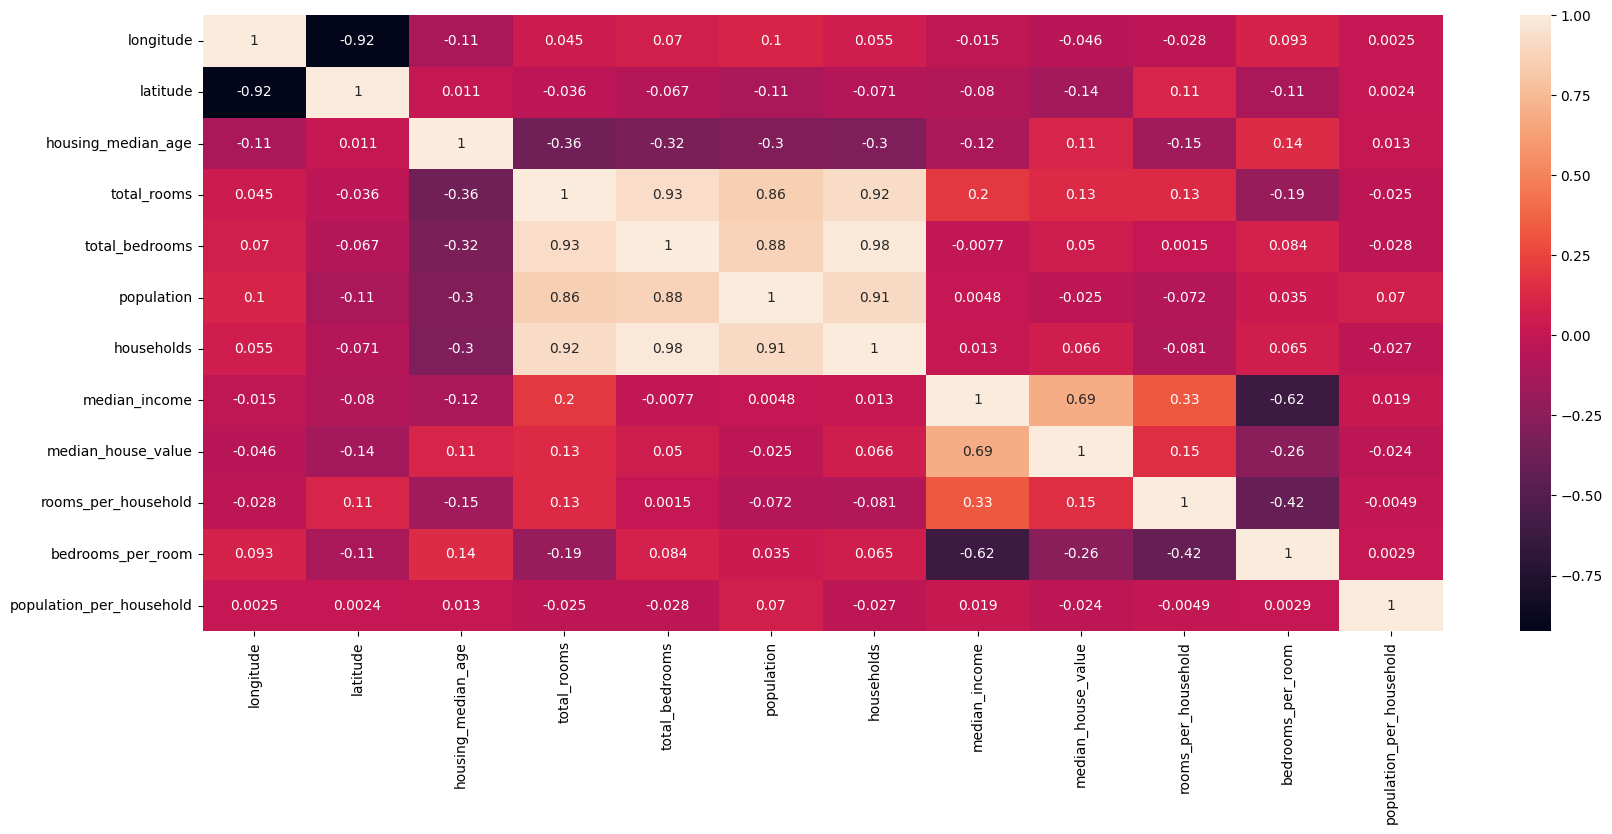

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(corr1,annot=True)
plt.show()

In [17]:
housing.drop(columns=['total_rooms','total_bedrooms','population','households'],inplace=True)

In [73]:
housing.head(22222)


,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
16342,-121.32,38.03,16.0,4.8750,143100.0,INLAND,6.472000,0.154017,2.979200
8548,-118.34,33.88,42.0,3.2589,233300.0,<1H OCEAN,4.215116,0.252414,2.866279
14187,-117.06,32.71,21.0,3.8194,125700.0,NEAR OCEAN,4.791774,0.208155,3.850900
20431,-118.80,34.21,16.0,6.2893,282700.0,<1H OCEAN,7.014354,0.133697,3.162679
7042,-118.09,33.94,33.0,3.8542,175400.0,<1H OCEAN,5.002532,0.204453,3.491139
...,...,...,...,...,...,...,...,...,...
10177,-117.97,33.86,12.0,3.6471,141700.0,<1H OCEAN,4.628378,0.267883,3.452703
2005,-119.80,36.74,25.0,0.7990,51800.0,INLAND,3.645435,0.315667,2.851380
1079,-121.82,39.73,44.0,2.2925,85800.0,INLAND,4.669329,0.225453,2.190096
6285,-117.93,34.04,23.0,4.9342,181000.0,<1H OCEAN,5.735798,0.183619,4.129847


In [19]:
housing[housing['median_house_value']>=500000]

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
89,-122.27,37.80,52.0,1.2434,500001.0,NEAR BAY,2.929412,0.313253,4.658824
459,-122.25,37.87,52.0,1.1696,500001.0,NEAR BAY,2.436000,0.387521,5.396000
493,-122.24,37.86,52.0,7.8521,500001.0,NEAR BAY,7.794393,0.134892,2.415888
494,-122.24,37.85,52.0,9.3959,500001.0,NEAR BAY,7.512097,0.127214,2.754032
509,-122.23,37.83,52.0,7.8772,500001.0,NEAR BAY,8.282548,0.126756,2.623269
...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,5.1457,500001.0,<1H OCEAN,6.958333,0.174983,2.666667
20426,-118.69,34.18,11.0,10.0472,500001.0,<1H OCEAN,9.890756,0.117247,3.487395
20427,-118.80,34.19,4.0,8.6499,500001.0,<1H OCEAN,7.236059,0.142692,2.553439
20436,-118.69,34.21,10.0,12.5420,500001.0,<1H OCEAN,9.873315,0.111657,3.177898


Capped values: 965 out of 20640 (4.68%)


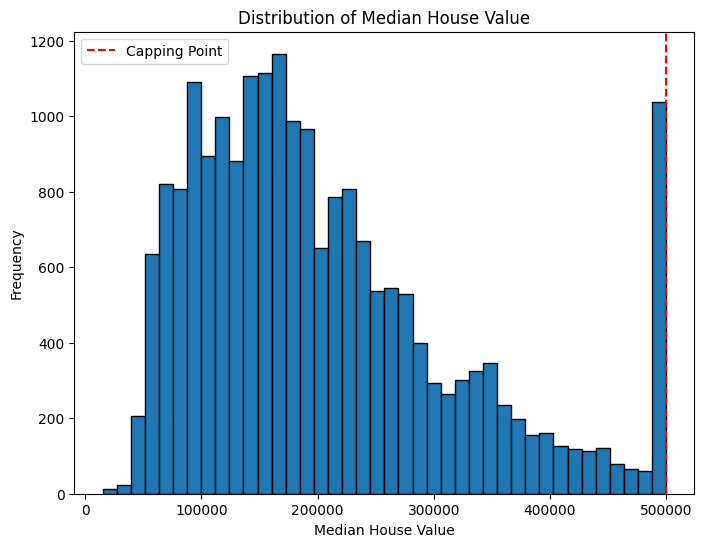

In [20]:
capped_values = housing[housing['median_house_value'] >= 500001]
print(f"Capped values: {len(capped_values)} out of {len(housing)} ({len(capped_values)/len(housing)*100:.2f}%)")


plt.figure(figsize=(8, 6))
plt.hist(housing['median_house_value'], bins=40, edgecolor='black')
plt.axvline(x=500001, color='r', linestyle='--', label='Capping Point')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.legend()
plt.show()

In [21]:
housing.shape


(20640, 9)

In [22]:
housing=housing.sample(20640)
housing=housing.sample(20640)
housing=housing.sample(20640)
housing=housing.sample(20640)

In [23]:
housing


,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
16342,-121.32,38.03,16.0,4.8750,143100.0,INLAND,6.472000,0.154017,2.979200
8548,-118.34,33.88,42.0,3.2589,233300.0,<1H OCEAN,4.215116,0.252414,2.866279
14187,-117.06,32.71,21.0,3.8194,125700.0,NEAR OCEAN,4.791774,0.208155,3.850900
20431,-118.80,34.21,16.0,6.2893,282700.0,<1H OCEAN,7.014354,0.133697,3.162679
7042,-118.09,33.94,33.0,3.8542,175400.0,<1H OCEAN,5.002532,0.204453,3.491139
...,...,...,...,...,...,...,...,...,...
10177,-117.97,33.86,12.0,3.6471,141700.0,<1H OCEAN,4.628378,0.267883,3.452703
2005,-119.80,36.74,25.0,0.7990,51800.0,INLAND,3.645435,0.315667,2.851380
1079,-121.82,39.73,44.0,2.2925,85800.0,INLAND,4.669329,0.225453,2.190096
6285,-117.93,34.04,23.0,4.9342,181000.0,<1H OCEAN,5.735798,0.183619,4.129847


In [24]:
housing.describe()


,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion

In [26]:
x_train,x_test,y_train,y_test=train_test_split(housing.drop(columns=['median_house_value']),housing['median_house_value'],test_size=0.20,random_state=42)

In [27]:
x_train.head()


,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
16285,-121.28,37.92,30.0,2.4412,INLAND,5.441026,0.216777,4.364103
10378,-117.64,33.64,11.0,6.1935,<1H OCEAN,6.131646,0.177126,2.050633
2504,-120.45,36.86,34.0,2.3523,INLAND,3.697802,0.257058,2.961538
11856,-120.15,39.80,19.0,3.0625,INLAND,5.607143,0.192357,2.614286
10571,-117.67,33.66,4.0,4.7341,<1H OCEAN,5.274754,0.214349,2.468637


In [28]:
x_test.head()


,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
7034,-118.08,33.95,32.0,4.8304,<1H OCEAN,4.929648,0.197248,3.201005
1041,-120.98,38.34,27.0,3.5508,INLAND,5.785000,0.188130,2.988333
2192,-119.95,36.80,30.0,3.4297,INLAND,6.195980,0.173560,3.115578
9594,-120.46,37.33,17.0,3.2852,INLAND,5.535326,0.191622,2.672101
9327,-122.52,37.95,37.0,6.2862,NEAR BAY,5.072464,0.162857,2.594203


In [29]:
x_test['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     1831
INLAND        1282
NEAR OCEAN     543
NEAR BAY       471
ISLAND           1
Name: count, dtype: int64

In [30]:
num_attribute=list(housing.drop(columns=['ocean_proximity','median_house_value']))


In [31]:
num_attribute


['longitude',
 'latitude',
 'housing_median_age',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [32]:
cat_attribute=['ocean_proximity']


In [33]:
pipeline1=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
    
],verbose=True)

In [34]:
pipeline2=Pipeline(steps=[
    ('Label Encoder',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'))
])


In [35]:
preprocessor=ColumnTransformer(transformers=[
    ('Pipeline 1 For Numerical Columns ',pipeline1,num_attribute),
    ('Encoder For Cateogrical Columns',pipeline2,cat_attribute)
])

In [36]:
preprocessor



ColumnTransformer(transformers=[('Pipeline 1 For Numerical Columns ',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())],
                                          verbose=True),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'median_income', 'rooms_per_household',
                                  'bedrooms_per_room',
                                  'population_per_household']),
                                ('Encoder For Cateogrical Columns',
                                 Pipeline(steps=[('Label Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [37]:
x_train.shape


(16512, 8)

In [38]:
x_train_transformed=preprocessor.fit_transform(x_train)


[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


In [39]:
x_train_transformed.shape


(16512, 11)

In [40]:
x_test.shape


(4128, 8)

In [41]:
x_test_transformed=preprocessor.fit_transform(x_test)


[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


In [42]:
x_test_transformed.shape


(4128, 11)

In [43]:
x_test['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     1831
INLAND        1282
NEAR OCEAN     543
NEAR BAY       471
ISLAND           1
Name: count, dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, explained_variance_score

In [45]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [46]:
y_pred_lr=lr.predict(x_test_transformed)


In [47]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_lr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_lr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score',r2_score(y_test,y_pred_lr))
print('Variance Score',explained_variance_score(y_test,y_pred_lr))

Percentage Error 0.2912674269278069
Mean Square Error 5091253213.271131
RMSE 71353.01824920323
R2 Score 0.6147798703450416
Variance Score 0.6150529037787549


In [48]:
cv_score_lr=cross_val_score(lr,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')

In [49]:
rmse_lr=np.sqrt(-cv_score_lr)
print('CV Scores',rmse_lr)
print('RMSE',rmse_lr.mean())

CV Scores [71226.08431777 73222.82836412 69388.58524686 69817.27993936
 69846.26776256 69996.79003434 71476.79417174 70667.3567925
 71005.42943507 74181.81531631]
RMSE 71082.92313806155


In [50]:
rfr=RandomForestRegressor(n_estimators=100,max_features=8)


In [51]:
rfr.fit(x_train_transformed,y_train)


RandomForestRegressor(max_features=8)

In [52]:
y_pred_rfr=rfr.predict(x_test_transformed)


In [57]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_rfr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_rfr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_rfr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score',r2_score(y_test,y_pred_rfr))
print('Variance Score',explained_variance_score(y_test,y_pred_rfr))

Percentage Error 0.20145599293581926
Mean Square Error 2703578218.66562
RMSE 71353.01824920323
R2 Score 0.7954388225649565
Variance Score 0.8032362230752714


In [58]:
cv_score_rfr=cross_val_score(rfr,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')

In [59]:
rmse_rfr=np.sqrt(-cv_score_rfr)
print('CV Scores',rmse_rfr)
print('RMSE',rmse_rfr.mean())

CV Scores [46937.731862   53188.25381096 48985.75207914 46339.44687858
 48429.640056   47457.75136204 47798.37797876 49784.47747618
 47658.48226747 49625.40709784]
RMSE 48620.53208689726


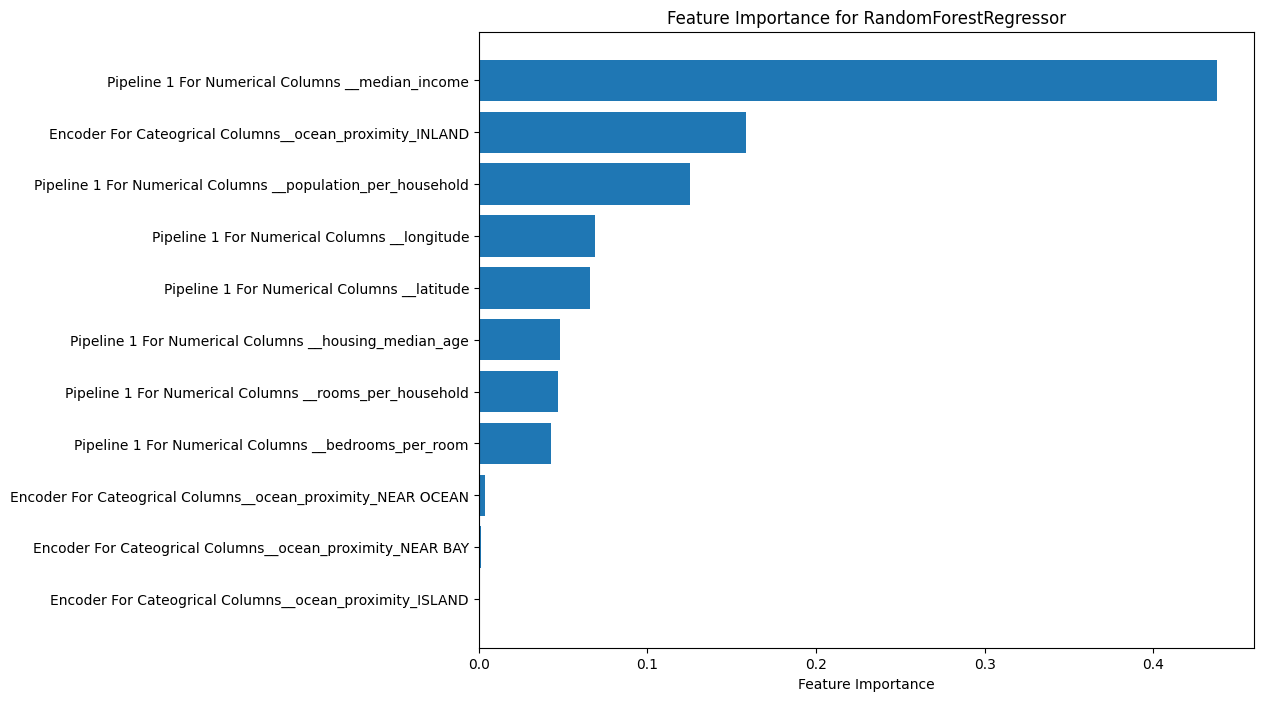

In [60]:
importances = rfr.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

In [61]:
svr=SVR(kernel='linear')


In [62]:
svr.fit(x_train_transformed,y_train)


SVR(kernel='linear')

In [63]:
y_pred_svr=svr.predict(x_test_transformed)


In [64]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_svr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_svr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_svr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

print('R2 Score',r2_score(y_test,y_pred_svr))
print('Variance Score',explained_variance_score(y_test,y_pred_svr))

Percentage Error 0.4719315198203135
Mean Square Error 12385750947.552412
RMSE 111291.28873165416
R2 Score 0.06285537449734468
Variance Score 0.12523160263951194
